Ricardo Barrios,
University of Central Florida

## Title : 2022 FIFA World Cup Prediction


### 1 Problem Statement : 
Soccer or Futbol is one of the most popular sports worldwide, with millions of fans turning into the FIFA World Cup every year. The high amount of viewership leads to a high amount of sports betting. We are trying to control the world of sports betting by providing a tool that will prevent the act of extreme betting and help the middle class who lose millions a year in betting on acts like the World Cup all the time.

### 2 Dataset :
https://www.kaggle.com/datasets/evangower/fifa-world-cup

### 3 Modeling Type and Technique:

**Machine Learning Model**
+ **Supervised Learning** : Models that can predict labels based on label training data.
+ **K-Nearest Neighbors

### 4 Implementation

In [419]:
# -------import all the required packages here-----
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

%matplotlib inline 

In [420]:
#reading in the world cup data from kaggle
df = pd.read_csv("matches.csv")
df.head()

#dropping the uneccesary columns and cleaning data
wc_data = df[[
    'home_team',
    'away_team',
    'home_score',
    'away_score',
    'outcome',
    'winning_team',
    'losing_team',]]
wc_data = wc_data.dropna()
wc_data.head()

,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team
0,France,Mexico,4,1,H,France,Mexico
1,Belgium,United States,0,3,A,United States,Belgium
2,Brazil,Yugoslavia,1,2,A,Yugoslavia,Brazil
3,Peru,Romania,1,3,A,Romania,Peru
4,Argentina,France,1,0,H,Argentina,France


In [421]:
#creating target column
wc_data.loc[wc_data['outcome'] == 'H', 'home_result'] = 'W'
wc_data.loc[wc_data['outcome'] == 'A', 'home_result'] = 'L'
wc_data.loc[wc_data['outcome'] == 'D', 'home_result'] = 'D'

wc_data.loc[wc_data['outcome'] == 'H', 'away_result'] = 'L'
wc_data.loc[wc_data['outcome'] == 'A', 'away_result'] = 'W'
wc_data.loc[wc_data['outcome'] == 'D', 'away_result'] = 'D'

#creating feature column
wc_data.loc[wc_data['home_score'] > wc_data['away_score'], 'goal_diff'] = wc_data['home_score'] - wc_data['away_score']
wc_data.loc[wc_data['home_score'] <= wc_data['away_score'], 'goal_diff'] = wc_data['home_score'] - wc_data['away_score']
wc_data = wc_data.dropna()
wc_data

,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,home_result,away_result,goal_diff
0,France,Mexico,4,1,H,France,Mexico,W,L,3.0
1,Belgium,United States,0,3,A,United States,Belgium,L,W,-3.0
2,Brazil,Yugoslavia,1,2,A,Yugoslavia,Brazil,L,W,-1.0
3,Peru,Romania,1,3,A,Romania,Peru,L,W,-2.0
4,Argentina,France,1,0,H,Argentina,France,W,L,1.0
...,...,...,...,...,...,...,...,...,...,...
895,Russia,Croatia,2,2,A,Croatia,Russia,L,W,0.0
896,France,Belgium,1,0,H,France,Belgium,W,L,1.0
897,Croatia,England,2,1,H,Croatia,England,W,L,1.0
898,Belgium,England,2,0,H,Belgium,England,W,L,2.0


In [422]:
## here im thinking of implementing a loop that would go through a dataframe and take the names of two countries in a group
## (group of 4) and getting all of the information on them from which theyve played each other

groups = [['Qatar','Ecuador', 'Senegal', 'Netherlands'],
          ['England', 'Iran', 'United States', 'Wales'],
          ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'],
          ['France', 'Australia', 'Denmark', 'Tunisia'],
          ['Spain', 'Costa Rica', 'Germany', 'Japan'],
          ['Belgium', 'Canada', 'Morocco', 'Croatia'],
          ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
          ['Portugal', 'Ghana', 'Uruguay', 'South Korea']]

##loop that is going to add each countries avg last 5 stats to the wc_data dataframe
## loop through countries_avg range and if countries_avg.iloc([index, 'team']) == home_team then
## basically, wc_data[home_avg_goals_for] = countries_avg.iloc([index, 'avg_goals_for']) // or replace or something
## may also need to simply initialize the extra columns to 0 then replace each one by looping through wc_data and replacing the index
home_countries = pd.DataFrame()
away_countries = pd.DataFrame()
for i in wc_data.itertuples():
    home = i.home_team
    away = i.away_team
    
    ## create dataframes that contain each game that the home and away team for match 'i' in wc_data have ever played
    home_df = wc_data.loc[(wc_data['home_team'] == home) | (wc_data['away_team'] == home)].copy()
    home_last_5 = home_df.tail().copy()
    away_df = wc_data.loc[(wc_data['home_team'] == away) | (wc_data['away_team'] == away)].copy()
    away_last_5 = away_df.tail().copy()
    
    ## create a couple of useful features (goals for and goals against)
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_for'] = home_last_5['home_score']
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_against'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_for'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_against'] = home_last_5['home_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_for'] = away_last_5['away_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_against'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_for'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_against'] = away_last_5['away_score']
    
    ## create another feature (points awarded for match)
    home_last_5['target_win'] = np.where(home_last_5['goals_for'] == home_last_5['goals_against'], int(1), int(2))
    home_last_5['target_win'] = np.where(((home_last_5['target_win'] == int(2)) & (home_last_5['goals_for'] > home_last_5['goals_against'])), int(2), int(0))
    away_last_5['target_win'] = np.where(away_last_5['goals_for'] == away_last_5['goals_against'], int(1), int(2))
    away_last_5['target_win'] = np.where(((away_last_5['target_win'] == int(2)) & (away_last_5['goals_for'] > away_last_5['goals_against'])), int(2), int(0))
    
    ## average out the stats of the last 5 games of the specified team and add it to the list of matches
    home_country_avg = pd.DataFrame([home], columns=['team'])
    home_country_avg['home_avg_goals_for'] = home_last_5['goals_for'].mean()
    home_country_avg['home_avg_goals_against'] = home_last_5['goals_against'].mean()
    home_country_avg['home_avg_win_points'] = home_last_5['target_win'].mean()
    home_countries = pd.concat([home_countries, home_country_avg])
    
    away_country_avg = pd.DataFrame([away], columns=['team'])
    away_country_avg['away_avg_goals_for'] = away_last_5['goals_for'].mean()
    away_country_avg['away_avg_goals_against'] = away_last_5['goals_against'].mean()
    away_country_avg['away_avg_win_points'] = away_last_5['target_win'].mean()
    away_countries = pd.concat([away_countries, away_country_avg])


## now add the new created features onto the wc_data dataframe
home_countries = home_countries.reset_index()
away_countries = away_countries.reset_index()
wc_data_extended = wc_data.copy()
wc_data_extended = pd.concat([wc_data_extended, home_countries.home_avg_goals_for], axis=1)
wc_data_extended = pd.concat([wc_data_extended, home_countries.home_avg_goals_against], axis=1)
wc_data_extended = pd.concat([wc_data_extended, home_countries.home_avg_win_points], axis=1)
wc_data_extended = pd.concat([wc_data_extended, away_countries.away_avg_goals_for], axis=1)
wc_data_extended = pd.concat([wc_data_extended, away_countries.away_avg_goals_against], axis=1)
wc_data_extended = pd.concat([wc_data_extended, away_countries.away_avg_win_points], axis=1)
wc_data_extended = wc_data_extended.dropna()


wc_data_extended

,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,home_result,away_result,goal_diff,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points
0,France,Mexico,4.0,1.0,H,France,Mexico,W,L,3.0,2.4,1.0,2.0,0.8,1.6,0.8
1,Belgium,United States,0.0,3.0,A,United States,Belgium,L,W,-3.0,1.6,0.8,1.6,1.0,1.2,0.8
2,Brazil,Yugoslavia,1.0,2.0,A,Yugoslavia,Brazil,L,W,-1.0,1.4,1.0,1.2,1.6,1.2,1.2
3,Peru,Romania,1.0,3.0,A,Romania,Peru,L,W,-2.0,0.6,2.6,0.4,1.6,1.2,1.2
4,Argentina,France,1.0,0.0,H,Argentina,France,W,L,1.0,1.0,1.8,0.4,2.4,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,Spain,Switzerland,0.0,1.0,A,Switzerland,Spain,L,W,-1.0,1.4,1.0,1.2,1.6,0.8,1.6
725,Argentina,South Korea,4.0,1.0,H,Argentina,South Korea,W,L,3.0,1.2,0.8,1.2,0.8,1.2,0.4
726,France,Mexico,0.0,2.0,A,Mexico,France,L,W,-2.0,2.2,1.4,0.8,1.8,1.8,0.8
727,Greece,Nigeria,2.0,1.0,H,Greece,Nigeria,W,L,1.0,2.4,1.0,2.0,1.6,0.8,1.6


In [423]:
#Train a classifier on training data
## import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss

from sklearn.neighbors import KNeighborsClassifier

In [424]:
## specify target and features
target = wc_data_extended[['home_result']].replace(['W','L','D'],[2,0,1])

features = wc_data_extended[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]

## split data
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, stratify = target)

In [425]:
model = KNeighborsClassifier(15)
model.fit(X_train, np.ravel(y_train))
accuracy = model.score(X_test, np.ravel(y_test))
acc = model.score(X_train, np.ravel(y_train))
#model.predict_proba(X_test)

print("test accuracy")
print(model, accuracy)
print("train accuracy")
print(model, acc)
print(model.predict(X_test))

test accuracy
KNeighborsClassifier(n_neighbors=15) 0.6647727272727273
train accuracy
KNeighborsClassifier(n_neighbors=15) 0.6268292682926829
[0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 0 2 2 2 2 0 0 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 0 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 2 0 0 2 2 0 2 2 2 0
 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 0 0 0 0 2 2 0 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]


###### 5 Visualization :

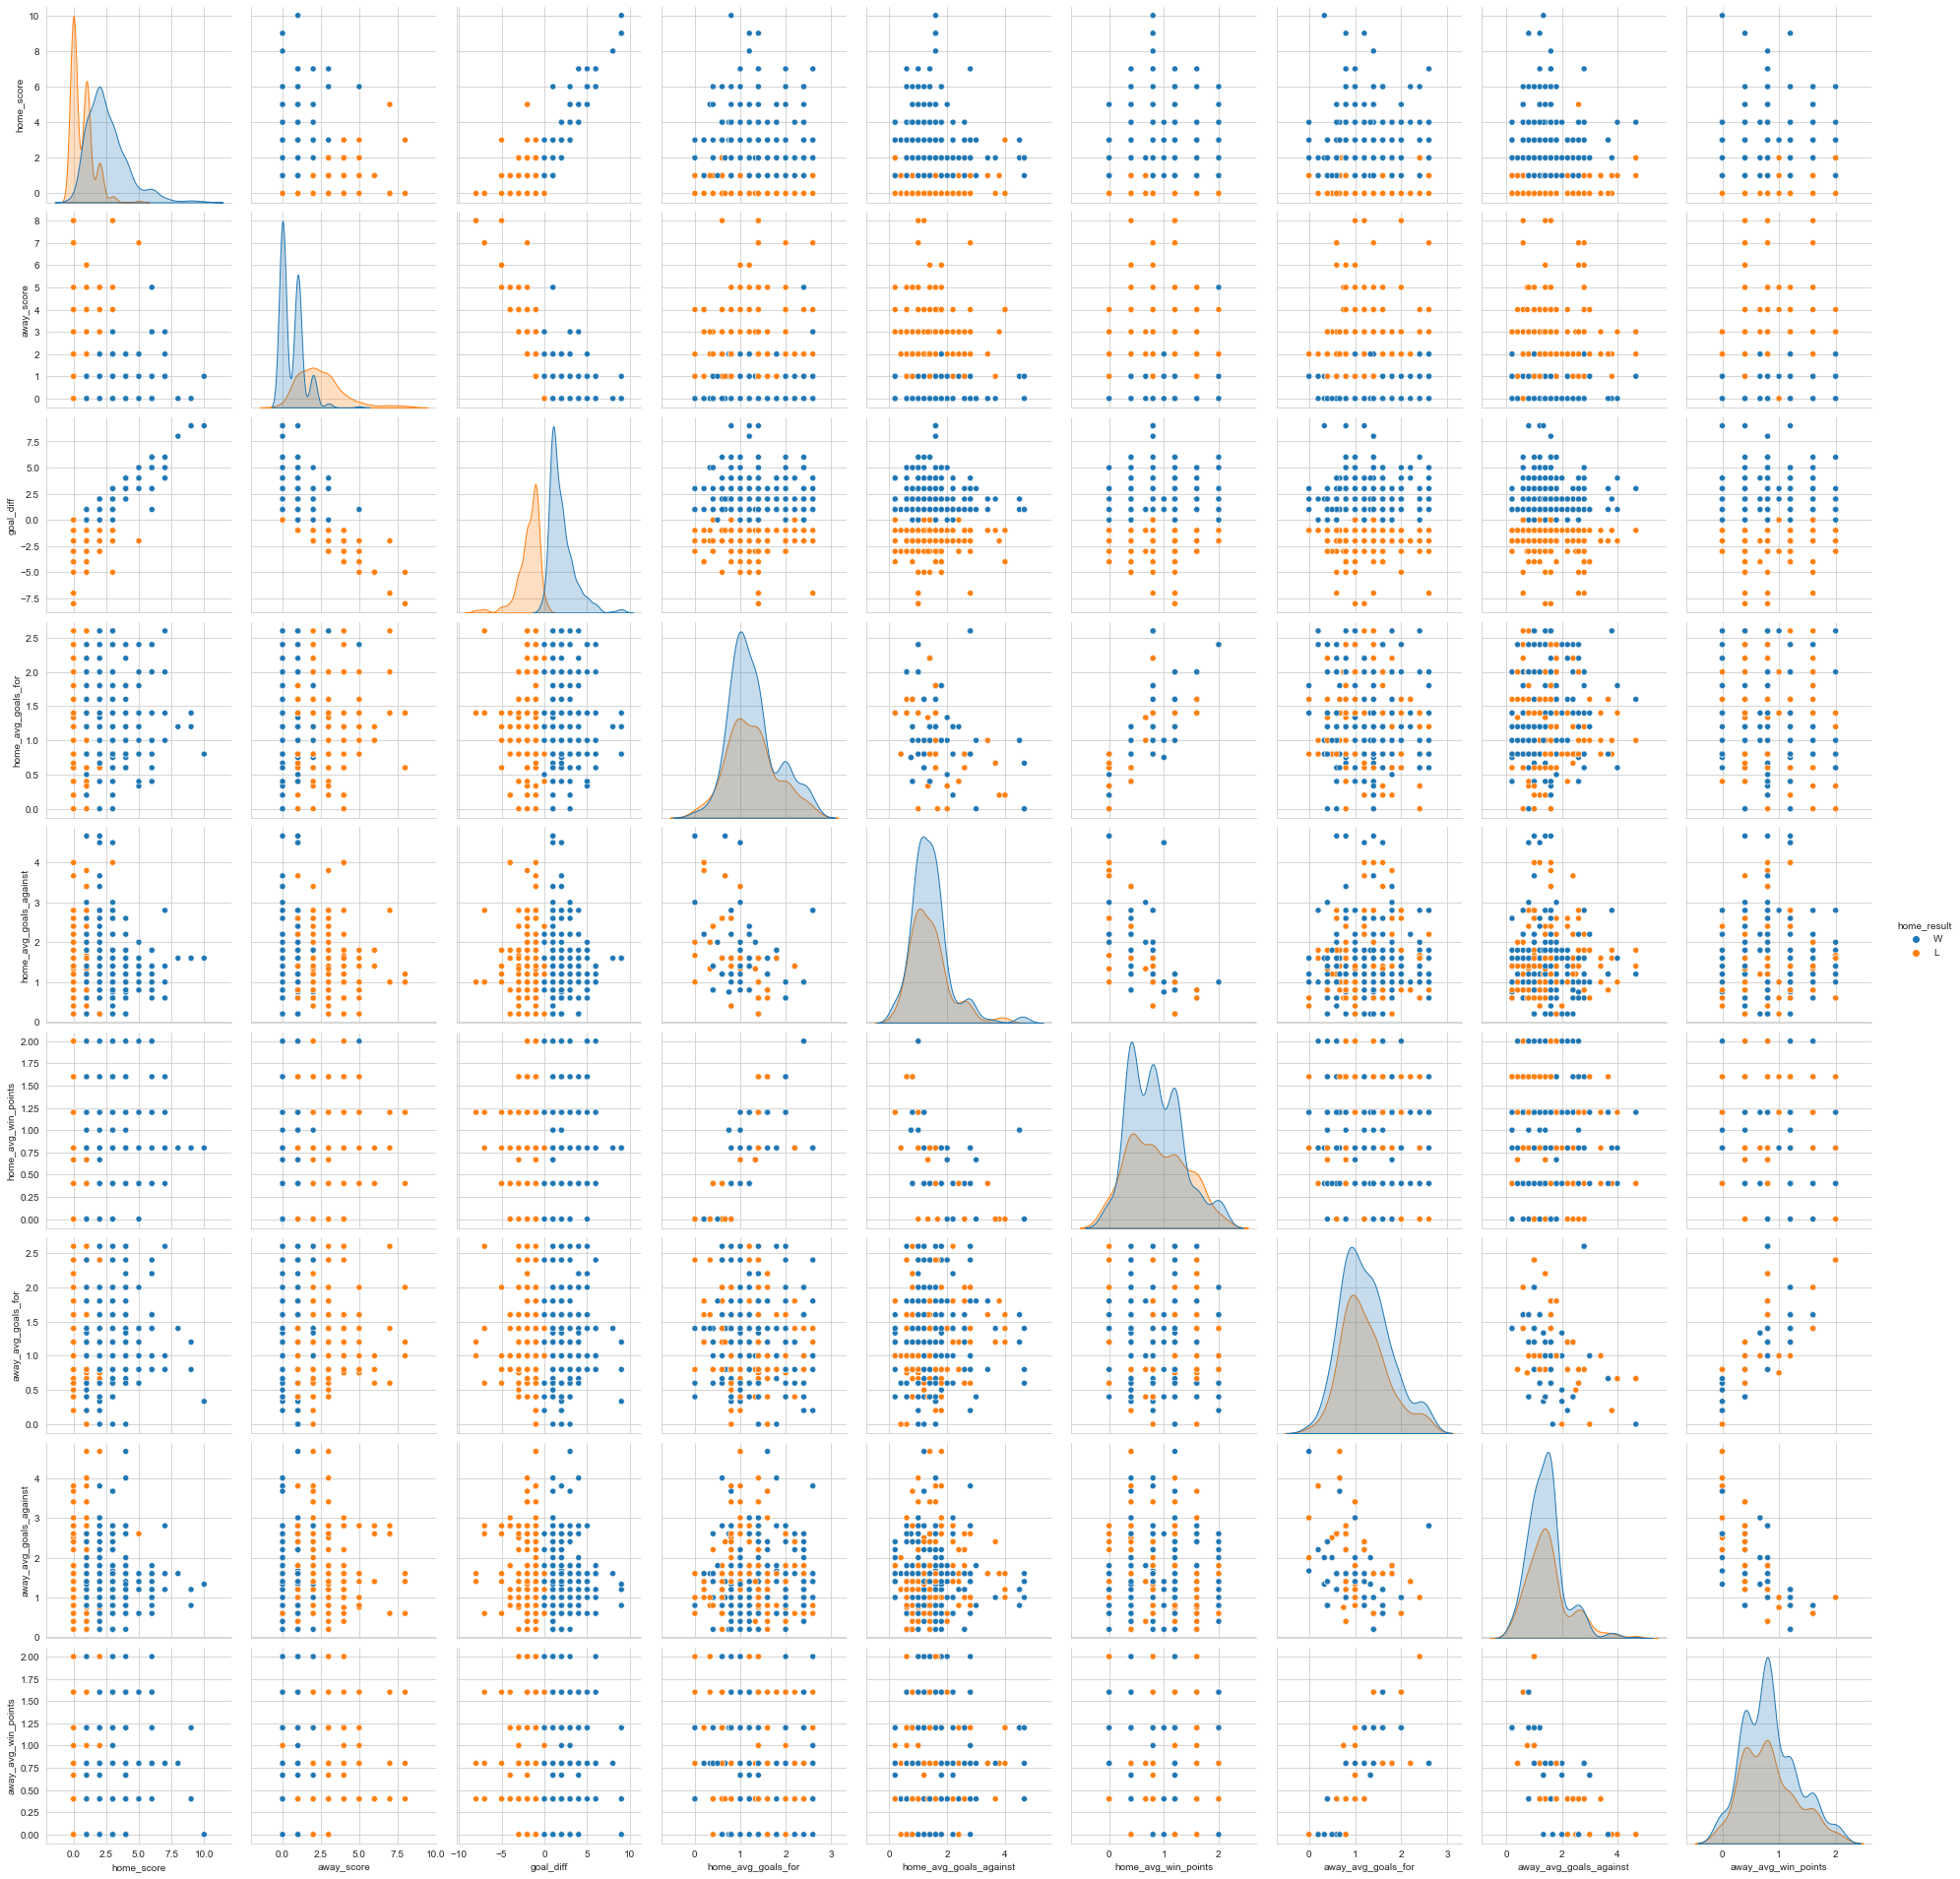

In [426]:
####################################
## PLOT TEST PREDICTIONS
####################################
plt.close();
sns.set_style("whitegrid");
sns.pairplot(wc_data_extended, hue="home_result", height=3);
plt.show()

In [427]:
####################################
## GROUP STAGE SETUP
####################################

import itertools
## now that we've trained the model and see it works, lets make a new test_X dataframe that will hold matchups we want to predict
## here is where i want to run the model on this years world cup matches
groups = [['Qatar','Ecuador', 'Senegal', 'Netherlands'],
          ['England', 'Iran', 'United States', 'Wales'],
          ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'],
          ['France', 'Australia', 'Denmark', 'Tunisia'],
          ['Spain', 'Costa Rica', 'Germany', 'Japan'],
          ['Belgium', 'Canada', 'Morocco', 'Croatia'],
          ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
          ['Portugal', 'Ghana', 'Uruguay', 'South Korea']]

##############################################
## all of these loops are going to give us the group matches
groups_perm = []
for group in groups:
    res = itertools.permutations(group)
    match = []
    for i in res:
        groups_perm.append(i)

groups_focus = []
for i in range(8):
    for j in range(6):
        groups_focus.append(groups_perm[24*i+j])

matches_home = []
matches_away = []
for i in range(8):
    ## groups round 1
    matches_home.append(groups_focus[6*i][0])
    matches_away.append(groups_focus[6*i][3])
    matches_home.append(groups_focus[6*i][1])
    matches_away.append(groups_focus[6*i][2])
    
    ## groups round 2
    matches_home.append(groups_focus[6*i+1][0])
    matches_away.append(groups_focus[6*i+1][3])
    matches_home.append(groups_focus[6*i+1][1])
    matches_away.append(groups_focus[6*i+1][2])
    
    ## groups round 3
    matches_home.append(groups_focus[6*i+5][0])
    matches_away.append(groups_focus[6*i+5][3])
    matches_home.append(groups_focus[6*i+5][1])
    matches_away.append(groups_focus[6*i+5][2])


## creating the dataframe that hold the home and away team for current wc matches
dict = {'home_team': matches_home, 'away_team': matches_away}  
curr_wc_matches = pd.DataFrame(dict)

## we need to do the same process as we did on wc_data in order to make features and a target for the future wc matches dataframe
home_countries = pd.DataFrame()
away_countries = pd.DataFrame()
for i in curr_wc_matches.itertuples():
    home = i.home_team
    away = i.away_team
    
    ## create dataframes that contain each game that the home and away team for match 'i' in wc_data have ever played
    home_df = wc_data.loc[(wc_data['home_team'] == home) | (wc_data['away_team'] == home)].copy()
    home_last_5 = home_df.tail().copy()
    away_df = wc_data.loc[(wc_data['home_team'] == away) | (wc_data['away_team'] == away)].copy()
    away_last_5 = away_df.tail().copy()
    
    ## create a couple of useful features (goals for and goals against)
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_for'] = home_last_5['home_score']
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_against'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_for'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_against'] = home_last_5['home_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_for'] = away_last_5['away_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_against'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_for'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_against'] = away_last_5['away_score']
    
    ## create another feature (points awarded for match)
    home_last_5['target_win'] = np.where(home_last_5['goals_for'] == home_last_5['goals_against'], int(1), int(2))
    home_last_5['target_win'] = np.where(((home_last_5['target_win'] == int(2)) & (home_last_5['goals_for'] > home_last_5['goals_against'])), int(2), int(0))
    away_last_5['target_win'] = np.where(away_last_5['goals_for'] == away_last_5['goals_against'], int(1), int(2))
    away_last_5['target_win'] = np.where(((away_last_5['target_win'] == int(2)) & (away_last_5['goals_for'] > away_last_5['goals_against'])), int(2), int(0))
    
    ## average out the stats of the last 5 games of the specified team and add it to the list of matches
    home_country_avg = pd.DataFrame([home], columns=['team'])
    home_country_avg['home_avg_goals_for'] = home_last_5['goals_for'].mean()
    home_country_avg['home_avg_goals_against'] = home_last_5['goals_against'].mean()
    home_country_avg['home_avg_win_points'] = home_last_5['target_win'].mean()
    home_countries = pd.concat([home_countries, home_country_avg])
    away_country_avg = pd.DataFrame([away], columns=['team'])
    away_country_avg['away_avg_goals_for'] = away_last_5['goals_for'].mean()
    away_country_avg['away_avg_goals_against'] = away_last_5['goals_against'].mean()
    away_country_avg['away_avg_win_points'] = away_last_5['target_win'].mean()
    away_countries = pd.concat([away_countries, away_country_avg])
    
## add in all of the data for each country on to the current world cup match dataframe
home_countries = home_countries.reset_index()
away_countries = away_countries.reset_index()
curr_wc_matches_data = pd.DataFrame()
curr_wc_matches_data = pd.concat([curr_wc_matches_data, curr_wc_matches.home_team], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, curr_wc_matches.away_team], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, home_countries.home_avg_goals_for], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, home_countries.home_avg_goals_against], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, home_countries.home_avg_win_points], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, away_countries.away_avg_goals_for], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, away_countries.away_avg_goals_against], axis=1)
curr_wc_matches_data = pd.concat([curr_wc_matches_data, away_countries.away_avg_win_points], axis=1)
curr_wc_matches_data['home_result'] = ''
curr_wc_matches_data = curr_wc_matches_data.fillna(0).copy()

curr_wc_matches_data.head()

,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Qatar,Netherlands,0.0,0.0,0.0,1.4,0.2,1.2,
1,Ecuador,Senegal,1.2,1.4,0.8,1.0,0.8,1.2,
2,Qatar,Senegal,0.0,0.0,0.0,1.0,0.8,1.2,
3,Ecuador,Netherlands,1.2,1.4,0.8,1.4,0.2,1.2,
4,Qatar,Ecuador,0.0,0.0,0.0,1.2,1.4,0.8,


In [428]:
## here is where we will run the model on the group matches
## our train data is going to be the entire wc_data_extended dataframe and our test will be the entire curr_wc_matches_data dataframe
## ie. no need to do train_test_split

y_train = wc_data_extended[['home_result']].replace(['W','L','D'],[2,0,1])

X_train = wc_data_extended[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]

X_test = curr_wc_matches_data[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]
y_test = curr_wc_matches_data[['home_result']]

In [429]:
####################################
## PREDICTING GROUP STAGE MATCHES
####################################

model = KNeighborsClassifier(3)
model.fit(X_train, np.ravel(y_train))
group_predictions = model.predict(X_test)
accuracy = model.score(X_test, group_predictions)
acc = model.score(X_train, np.ravel(y_train))

print("train accuracy")
print(model, acc)
print(group_predictions)

curr_wc_matches_data['home_result'] = np.array(group_predictions)
curr_wc_matches_data

train accuracy
KNeighborsClassifier(n_neighbors=3) 0.7713310580204779
[2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2
 2 0 2 2 0 2 2 0 2 2 2]


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Qatar,Netherlands,0.0,0.000000,0.0,1.4,0.200000,1.2,2
1,Ecuador,Senegal,1.2,1.400000,0.8,1.0,0.800000,1.2,2
2,Qatar,Senegal,0.0,0.000000,0.0,1.0,0.800000,1.2,2
3,Ecuador,Netherlands,1.2,1.400000,0.8,1.4,0.200000,1.2,2
4,Qatar,Ecuador,0.0,0.000000,0.0,1.2,1.400000,0.8,2
5,Netherlands,Senegal,1.4,0.200000,1.2,1.0,0.800000,1.2,2
6,England,Wales,0.8,1.200000,0.4,1.0,1.000000,1.0,2
7,Iran,United States,0.4,1.400000,0.4,1.0,1.200000,0.8,2
8,England,United States,0.8,1.200000,0.4,1.0,1.200000,0.8,2
9,Iran,Wales,0.4,1.400000,0.4,1.0,1.000000,1.0,2


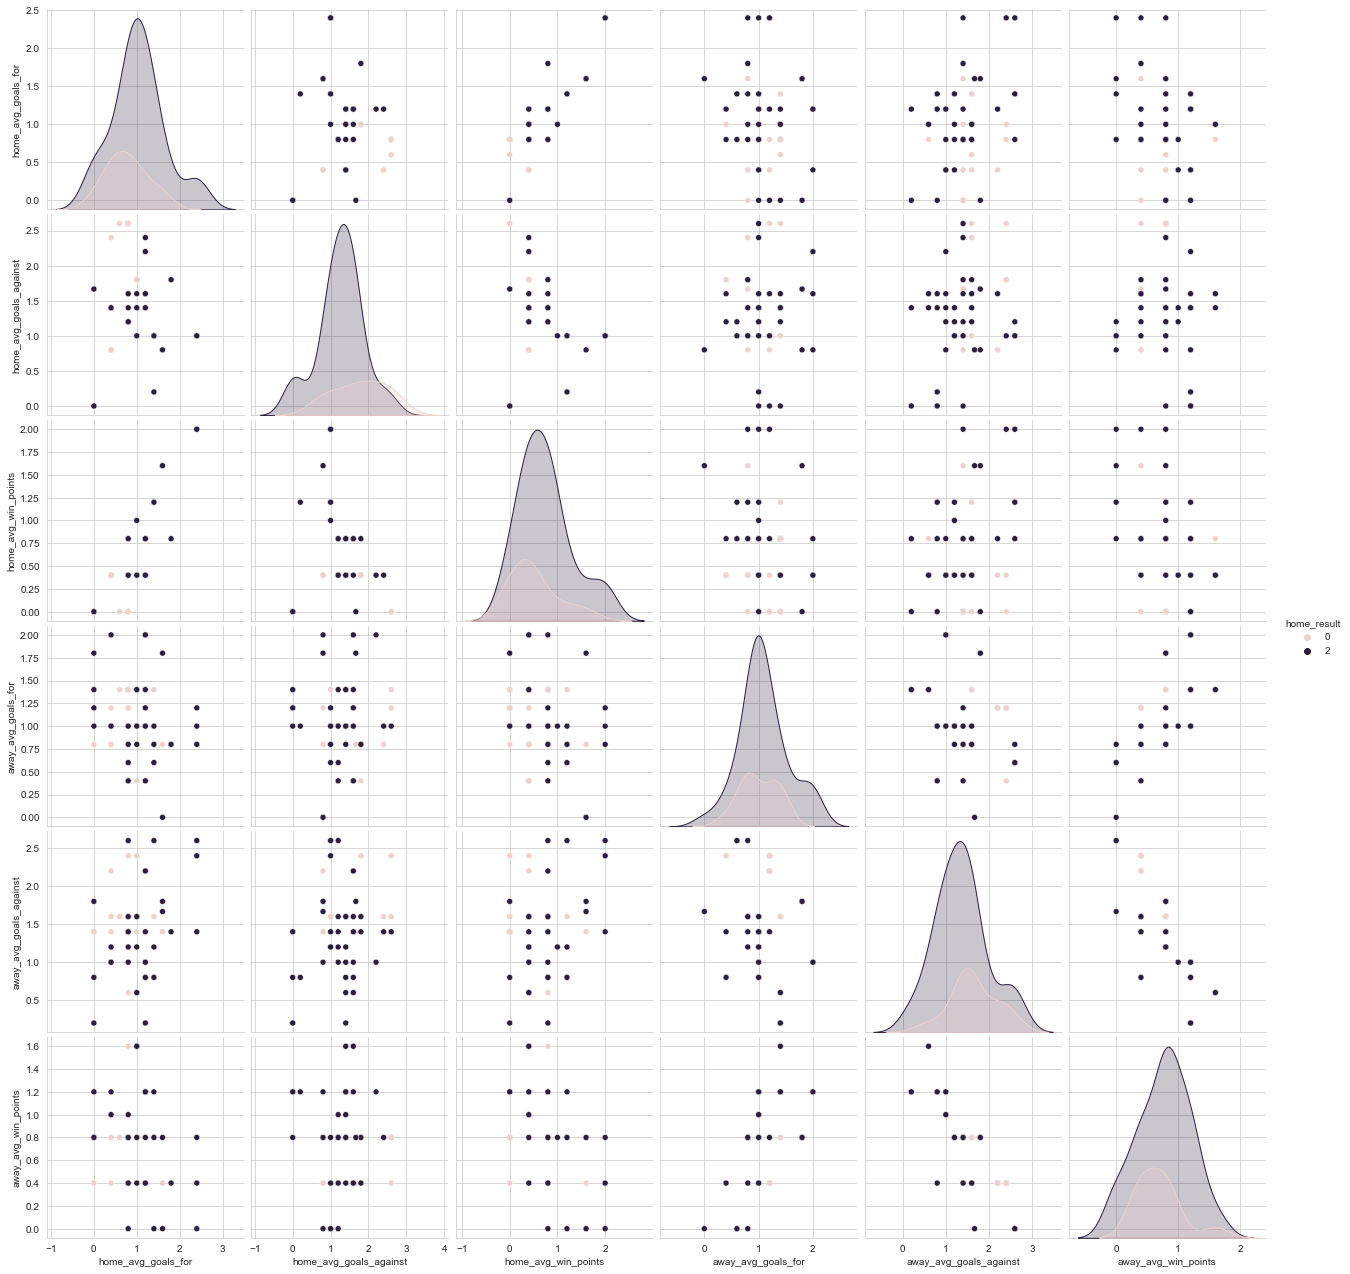

In [430]:
####################################
## PLOT GROUP PREDICTIONS
####################################
plt.close();
sns.set_style("whitegrid");
sns.pairplot(curr_wc_matches_data, hue="home_result", height=3);
plt.show()

In [431]:
####################################
## FINDING TOP 16 TEAMS
####################################

import itertools
## here i want to basically tally up the points for each team and decide winner and runner up for each group
teams = ['Qatar','Ecuador', 'Senegal', 'Netherlands','England', 'Iran', 'United States', 'Wales',
          'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
          'France', 'Australia', 'Denmark', 'Tunisia',
          'Spain', 'Costa Rica', 'Germany', 'Japan',
          'Belgium', 'Canada', 'Morocco', 'Croatia',
          'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
          'Portugal', 'Ghana', 'Uruguay', 'South Korea']
dicti = {'team': teams}  
teams_points = pd.DataFrame(dicti)
teams_points['points'] = 0
#teams_points

## this loop is going to input the teams total points through the group stage into the teams_points dataframe
for match in curr_wc_matches_data.itertuples():
    if match.home_result == 2:
        teams_points.loc[teams_points['team']==match.home_team, 'points'] += 2
    elif match.home_result == 0:
        teams_points.loc[teams_points['team']==match.away_team, 'points'] += 2
        
teams_points

## this loop is going to get the top 2 teams from each group and add it to another list
top_16_teams = []
## each group
for i in range(8):
    top_2_in_group = []
    top_2_vals = []
    for j in range(2):
        if j == 0:
            highest_val = 0
            highest_team = ''
        if j == 1:
            highest_val = 0
            highest_team = top_2_in_group[0]
        ## check each team in the group
        for x in range(4):
            if teams_points.iloc[4*i+x, 0] == highest_team:
                continue
            elif teams_points.iloc[4*i+x, 1] > highest_val:
                highest_val = teams_points.iloc[4*i+x, 1]
                curr_highest_team = teams_points.iloc[4*i+x, 0]
        top_2_in_group.append(curr_highest_team)
        top_2_vals.append(highest_val)
    top_16_teams.append(top_2_in_group)
    
print(str(top_16_teams))

[['Qatar', 'Ecuador'], ['England', 'Iran'], ['Poland', 'Argentina'], ['France', 'Tunisia'], ['Spain', 'Japan'], ['Belgium', 'Morocco'], ['Brazil', 'Serbia'], ['Portugal', 'Ghana']]


In [432]:
####################################
## TOP 16 SETUP
####################################

## at this point we should have our top 16 teams in top_16_teams, from there, make new matches and repeat the prediction process
home_top_16 = []
away_top_16 = []
home_top_16.append(top_16_teams[0][0])
away_top_16.append(top_16_teams[1][1])
home_top_16.append(top_16_teams[0][1])
away_top_16.append(top_16_teams[1][0])
home_top_16.append(top_16_teams[2][0])
away_top_16.append(top_16_teams[3][1])
home_top_16.append(top_16_teams[2][1])
away_top_16.append(top_16_teams[3][0])
home_top_16.append(top_16_teams[4][0])
away_top_16.append(top_16_teams[5][1])
home_top_16.append(top_16_teams[4][1])
away_top_16.append(top_16_teams[5][0])
home_top_16.append(top_16_teams[6][0])
away_top_16.append(top_16_teams[7][1])
home_top_16.append(top_16_teams[6][1])
away_top_16.append(top_16_teams[7][0])
dictio = {'home_team': home_top_16, 'away_team': away_top_16}
matches_top_16 = pd.DataFrame(dictio)
 
## we need to do the same process as we did on the group matches in order to make features and a target for the future wc matches dataframe
home_countries = pd.DataFrame()
away_countries = pd.DataFrame()
for i in matches_top_16.itertuples():
    home = i.home_team
    away = i.away_team
    
    ## create dataframes that contain each game that the home and away team for match 'i' in wc_data have ever played
    home_df = wc_data.loc[(wc_data['home_team'] == home) | (wc_data['away_team'] == home)].copy()
    home_last_5 = home_df.tail().copy()
    away_df = wc_data.loc[(wc_data['home_team'] == away) | (wc_data['away_team'] == away)].copy()
    away_last_5 = away_df.tail().copy()
    
    ## create a couple of useful features (goals for and goals against)
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_for'] = home_last_5['home_score']
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_against'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_for'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_against'] = home_last_5['home_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_for'] = away_last_5['away_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_against'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_for'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_against'] = away_last_5['away_score']
    
    ## create another feature (points awarded for match)
    home_last_5['target_win'] = np.where(home_last_5['goals_for'] == home_last_5['goals_against'], int(1), int(2))
    home_last_5['target_win'] = np.where(((home_last_5['target_win'] == int(2)) & (home_last_5['goals_for'] > home_last_5['goals_against'])), int(2), int(0))
    away_last_5['target_win'] = np.where(away_last_5['goals_for'] == away_last_5['goals_against'], int(1), int(2))
    away_last_5['target_win'] = np.where(((away_last_5['target_win'] == int(2)) & (away_last_5['goals_for'] > away_last_5['goals_against'])), int(2), int(0))
    
    ## average out the stats of the last 5 games of the specified team and add it to the list of matches
    home_country_avg = pd.DataFrame([home], columns=['team'])
    home_country_avg['home_avg_goals_for'] = home_last_5['goals_for'].mean()
    home_country_avg['home_avg_goals_against'] = home_last_5['goals_against'].mean()
    home_country_avg['home_avg_win_points'] = home_last_5['target_win'].mean()
    home_countries = pd.concat([home_countries, home_country_avg])
    away_country_avg = pd.DataFrame([away], columns=['team'])
    away_country_avg['away_avg_goals_for'] = away_last_5['goals_for'].mean()
    away_country_avg['away_avg_goals_against'] = away_last_5['goals_against'].mean()
    away_country_avg['away_avg_win_points'] = away_last_5['target_win'].mean()
    away_countries = pd.concat([away_countries, away_country_avg])
    
## add in all of the data for each country on to the current world cup match dataframe
home_countries = home_countries.reset_index()
away_countries = away_countries.reset_index()
top_16_matches_data = pd.DataFrame()
top_16_matches_data = pd.concat([top_16_matches_data, matches_top_16.home_team], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, matches_top_16.away_team], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, home_countries.home_avg_goals_for], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, home_countries.home_avg_goals_against], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, home_countries.home_avg_win_points], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, away_countries.away_avg_goals_for], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, away_countries.away_avg_goals_against], axis=1)
top_16_matches_data = pd.concat([top_16_matches_data, away_countries.away_avg_win_points], axis=1)
top_16_matches_data['home_result'] = ''
top_16_matches_data = top_16_matches_data.fillna(0).copy()

top_16_matches_data

,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Qatar,Iran,0.0,0.0,0.0,0.4,1.4,0.4,
1,Ecuador,England,1.2,1.4,0.8,0.8,1.2,0.4,
2,Poland,Tunisia,0.8,1.4,0.8,1.2,2.4,0.4,
3,Argentina,France,1.0,1.8,0.4,2.4,1.0,2.0,
4,Spain,Morocco,1.2,1.6,0.8,0.8,1.4,0.4,
5,Japan,Belgium,1.2,2.2,0.4,1.6,0.8,1.6,
6,Brazil,Ghana,1.4,1.0,1.2,1.0,1.4,0.4,
7,Serbia,Portugal,0.8,1.2,0.8,0.8,1.6,0.8,


In [433]:
#########################################
## MAKING FEATURES AND TARGET FOR MODEL
#########################################

y_train = wc_data_extended[['home_result']].replace(['W','L','D'],[2,0,1])

X_train = wc_data_extended[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]

X_test = top_16_matches_data[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]
y_test = top_16_matches_data[['home_result']]

In [434]:
####################################
## PREDICTING TOP 16 MATCHES
####################################

model = KNeighborsClassifier(6)
model.fit(X_train, np.ravel(y_train))
top_16_predictions = model.predict(X_test)
accuracy = model.score(X_test, top_16_predictions)
acc = model.score(X_train, np.ravel(y_train))

print("train accuracy")
print(model, acc)
print(top_16_predictions)

top_16_matches_data['home_result'] = np.array(top_16_predictions)
top_16_matches_data

train accuracy
KNeighborsClassifier(n_neighbors=6) 0.6604095563139932
[0 0 2 2 0 2 0 2]


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Qatar,Iran,0.0,0.0,0.0,0.4,1.4,0.4,0
1,Ecuador,England,1.2,1.4,0.8,0.8,1.2,0.4,0
2,Poland,Tunisia,0.8,1.4,0.8,1.2,2.4,0.4,2
3,Argentina,France,1.0,1.8,0.4,2.4,1.0,2.0,2
4,Spain,Morocco,1.2,1.6,0.8,0.8,1.4,0.4,0
5,Japan,Belgium,1.2,2.2,0.4,1.6,0.8,1.6,2
6,Brazil,Ghana,1.4,1.0,1.2,1.0,1.4,0.4,0
7,Serbia,Portugal,0.8,1.2,0.8,0.8,1.6,0.8,2


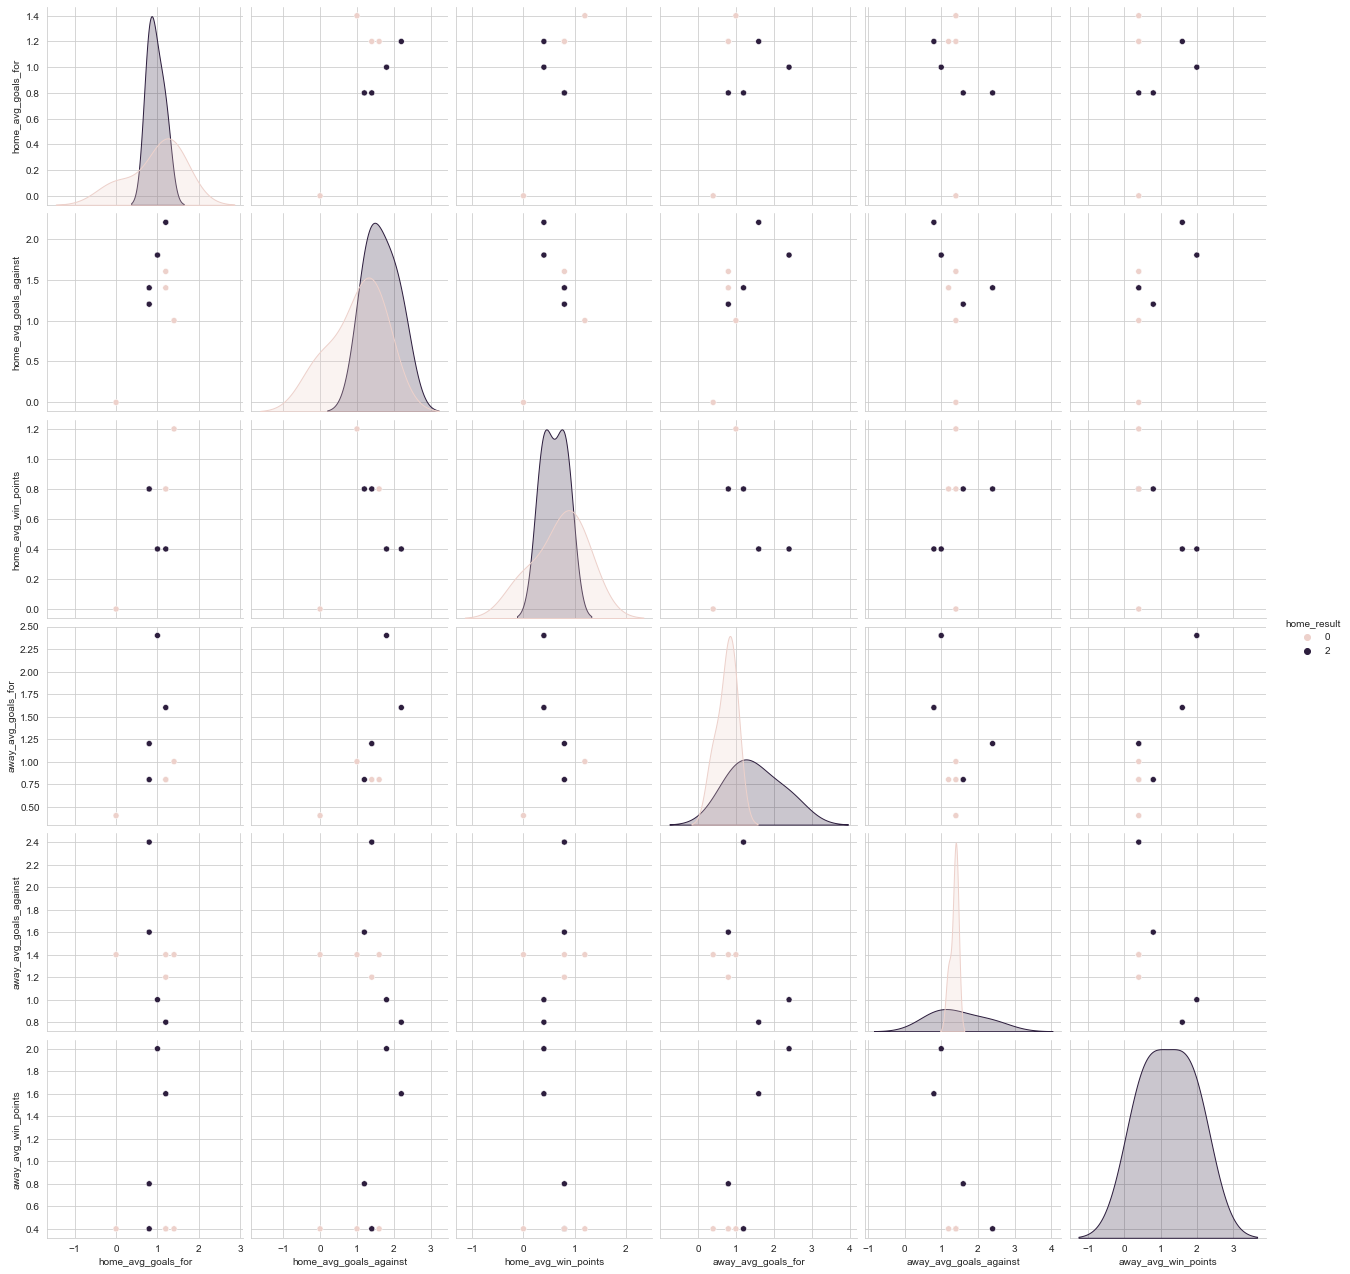

In [435]:
####################################
## PLOT TOP 16 PREDICTIONS
####################################
plt.close();
sns.set_style("whitegrid");
sns.pairplot(top_16_matches_data, hue="home_result", height=3);
plt.show()

In [436]:
####################################
## TOP 8 SETUP
####################################

top_8 = []
for match in top_16_matches_data.itertuples():
    if match.home_result == 2:
        top_8.append(match.home_team)
    elif match.home_result == 0:
        top_8.append(match.away_team)
print(str(top_8))

top_8_home = []
top_8_away = []
top_8_home.append(top_8[0])
top_8_away.append(top_8[2])
top_8_home.append(top_8[4])
top_8_away.append(top_8[6])
top_8_home.append(top_8[1])
top_8_away.append(top_8[3])
top_8_home.append(top_8[5])
top_8_away.append(top_8[7])

diction = {'home_team': top_8_home, 'away_team': top_8_away}
matches_top_8 = pd.DataFrame(diction)
#top_8_matches

## we need to do the same process as we did on the group matches in order to make features and a target for the future wc matches dataframe
home_countries = pd.DataFrame()
away_countries = pd.DataFrame()
for i in matches_top_8.itertuples():
    home = i.home_team
    away = i.away_team
    
    ## create dataframes that contain each game that the home and away team for match 'i' in wc_data have ever played
    home_df = wc_data.loc[(wc_data['home_team'] == home) | (wc_data['away_team'] == home)].copy()
    home_last_5 = home_df.tail().copy()
    away_df = wc_data.loc[(wc_data['home_team'] == away) | (wc_data['away_team'] == away)].copy()
    away_last_5 = away_df.tail().copy()
    
    ## create a couple of useful features (goals for and goals against)
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_for'] = home_last_5['home_score']
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_against'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_for'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_against'] = home_last_5['home_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_for'] = away_last_5['away_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_against'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_for'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_against'] = away_last_5['away_score']
    
    ## create another feature (points awarded for match)
    home_last_5['target_win'] = np.where(home_last_5['goals_for'] == home_last_5['goals_against'], int(1), int(2))
    home_last_5['target_win'] = np.where(((home_last_5['target_win'] == int(2)) & (home_last_5['goals_for'] > home_last_5['goals_against'])), int(2), int(0))
    away_last_5['target_win'] = np.where(away_last_5['goals_for'] == away_last_5['goals_against'], int(1), int(2))
    away_last_5['target_win'] = np.where(((away_last_5['target_win'] == int(2)) & (away_last_5['goals_for'] > away_last_5['goals_against'])), int(2), int(0))
    
    ## average out the stats of the last 5 games of the specified team and add it to the list of matches
    home_country_avg = pd.DataFrame([home], columns=['team'])
    home_country_avg['home_avg_goals_for'] = home_last_5['goals_for'].mean()
    home_country_avg['home_avg_goals_against'] = home_last_5['goals_against'].mean()
    home_country_avg['home_avg_win_points'] = home_last_5['target_win'].mean()
    home_countries = pd.concat([home_countries, home_country_avg])
    away_country_avg = pd.DataFrame([away], columns=['team'])
    away_country_avg['away_avg_goals_for'] = away_last_5['goals_for'].mean()
    away_country_avg['away_avg_goals_against'] = away_last_5['goals_against'].mean()
    away_country_avg['away_avg_win_points'] = away_last_5['target_win'].mean()
    away_countries = pd.concat([away_countries, away_country_avg])
    
## add in all of the data for each country on to the current world cup match dataframe
home_countries = home_countries.reset_index()
away_countries = away_countries.reset_index()
top_8_matches_data = pd.DataFrame()
top_8_matches_data = pd.concat([top_8_matches_data, matches_top_8.home_team], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, matches_top_8.away_team], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, home_countries.home_avg_goals_for], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, home_countries.home_avg_goals_against], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, home_countries.home_avg_win_points], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, away_countries.away_avg_goals_for], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, away_countries.away_avg_goals_against], axis=1)
top_8_matches_data = pd.concat([top_8_matches_data, away_countries.away_avg_win_points], axis=1)
top_8_matches_data['home_result'] = ''
top_8_matches_data = top_8_matches_data.fillna(0).copy()

top_8_matches_data

['Iran', 'England', 'Poland', 'Argentina', 'Morocco', 'Japan', 'Ghana', 'Serbia']


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Iran,Poland,0.4,1.4,0.4,0.8,1.4,0.8,
1,Morocco,Ghana,0.8,1.4,0.4,1.0,1.4,0.4,
2,England,Argentina,0.8,1.2,0.4,1.0,1.8,0.4,
3,Japan,Serbia,1.2,2.2,0.4,0.8,1.2,0.8,


In [437]:
#########################################
## MAKING FEATURES AND TARGET FOR MODEL
#########################################

y_train = wc_data_extended[['home_result']].replace(['W','L','D'],[2,0,1])

X_train = wc_data_extended[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]

X_test = top_8_matches_data[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]
y_test = top_8_matches_data[['home_result']]

In [438]:
####################################
## PREDICTING TOP 8 MATCHES
####################################

model = KNeighborsClassifier(6)
model.fit(X_train, np.ravel(y_train))
top_8_predictions = model.predict(X_test)
accuracy = model.score(X_test, top_8_predictions)
acc = model.score(X_train, np.ravel(y_train))

print("train accuracy")
print(model, acc)
print(top_8_predictions)

top_8_matches_data['home_result'] = np.array(top_8_predictions)
top_8_matches_data

train accuracy
KNeighborsClassifier(n_neighbors=6) 0.6604095563139932
[2 0 0 2]


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Iran,Poland,0.4,1.4,0.4,0.8,1.4,0.8,2
1,Morocco,Ghana,0.8,1.4,0.4,1.0,1.4,0.4,0
2,England,Argentina,0.8,1.2,0.4,1.0,1.8,0.4,0
3,Japan,Serbia,1.2,2.2,0.4,0.8,1.2,0.8,2


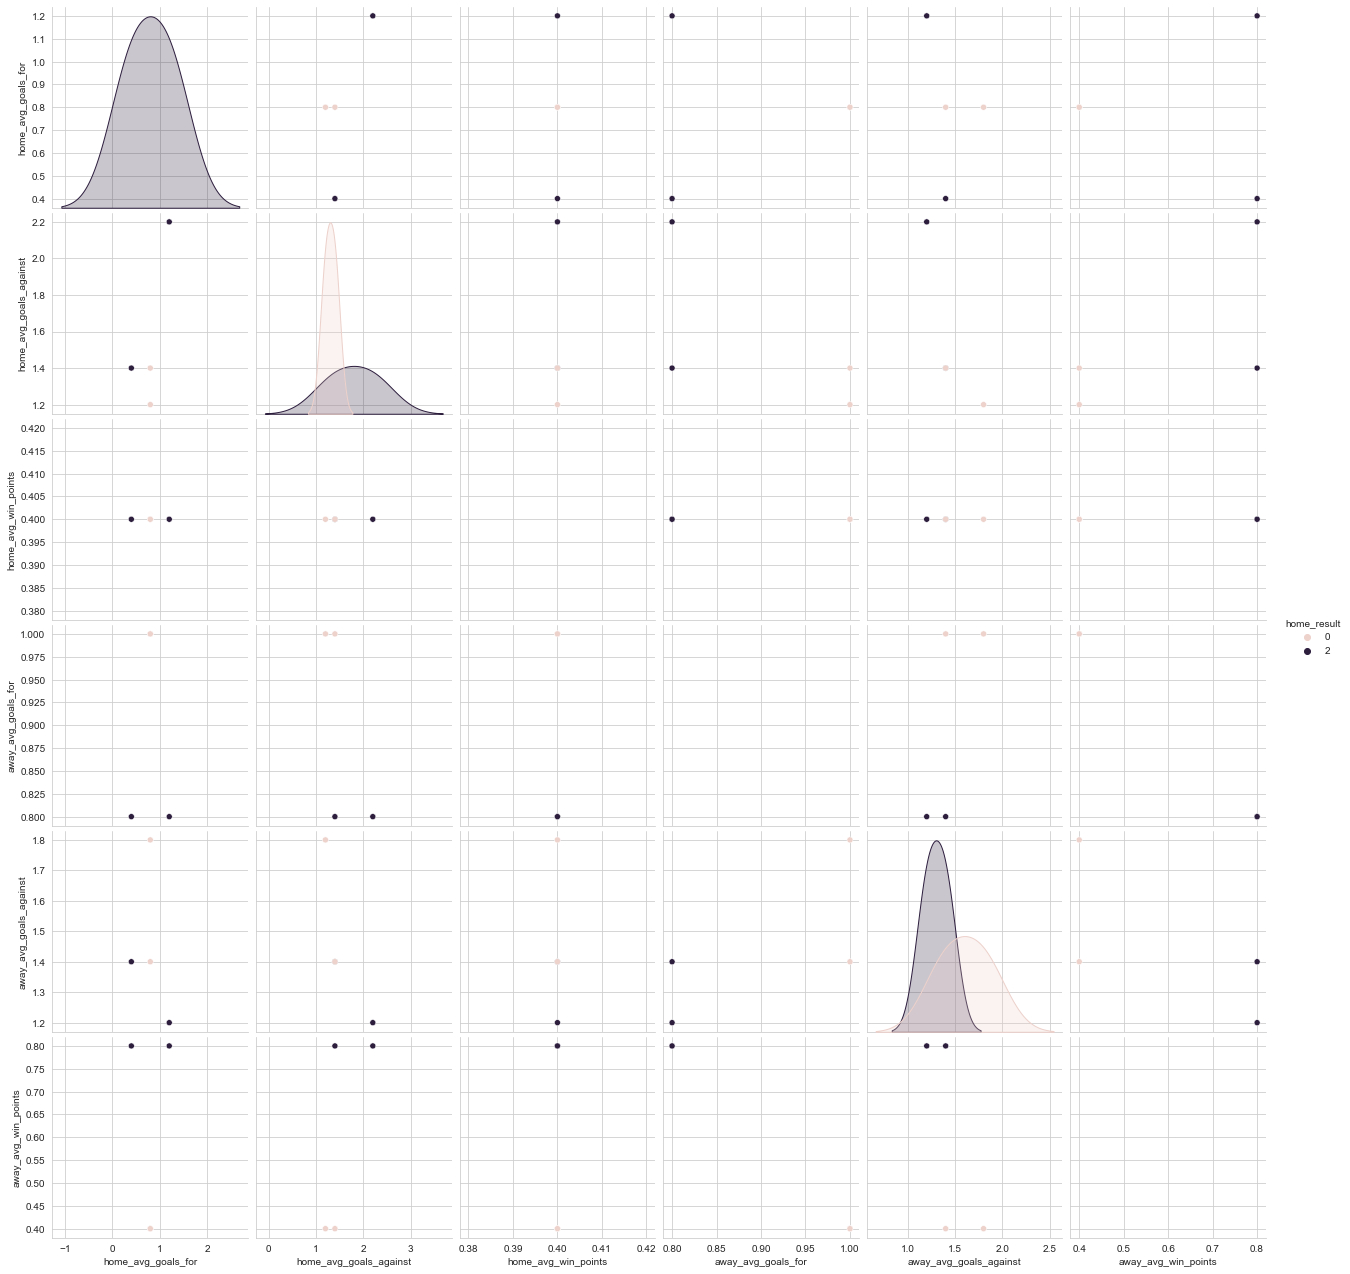

In [439]:
####################################
## PLOT TOP 8 PREDICTIONS
####################################
plt.close();
sns.set_style("whitegrid");
sns.pairplot(top_8_matches_data, hue="home_result", height=3);
plt.show()

In [440]:
####################################
## TOP 4 SETUP
####################################

top_4 = []
for match in top_8_matches_data.itertuples():
    if match.home_result == 2:
        top_4.append(match.home_team)
    elif match.home_result == 0:
        top_4.append(match.away_team)
#print(str(top_4))

top_4_home = []
top_4_away = []
top_4_home.append(top_4[0])
top_4_away.append(top_4[1])
top_4_home.append(top_4[2])
top_4_away.append(top_4[3])

diction = {'home_team': top_4_home, 'away_team': top_4_away}
matches_top_4 = pd.DataFrame(diction)
#top_8_matches

## we need to do the same process as we did on the group matches in order to make features and a target for the future wc matches dataframe
home_countries = pd.DataFrame()
away_countries = pd.DataFrame()
for i in matches_top_4.itertuples():
    home = i.home_team
    away = i.away_team
    
    ## create dataframes that contain each game that the home and away team for match 'i' in wc_data have ever played
    home_df = wc_data.loc[(wc_data['home_team'] == home) | (wc_data['away_team'] == home)].copy()
    home_last_5 = home_df.tail().copy()
    away_df = wc_data.loc[(wc_data['home_team'] == away) | (wc_data['away_team'] == away)].copy()
    away_last_5 = away_df.tail().copy()
    
    ## create a couple of useful features (goals for and goals against)
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_for'] = home_last_5['home_score']
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_against'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_for'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_against'] = home_last_5['home_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_for'] = away_last_5['away_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_against'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_for'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_against'] = away_last_5['away_score']
    
    ## create another feature (points awarded for match)
    home_last_5['target_win'] = np.where(home_last_5['goals_for'] == home_last_5['goals_against'], int(1), int(2))
    home_last_5['target_win'] = np.where(((home_last_5['target_win'] == int(2)) & (home_last_5['goals_for'] > home_last_5['goals_against'])), int(2), int(0))
    away_last_5['target_win'] = np.where(away_last_5['goals_for'] == away_last_5['goals_against'], int(1), int(2))
    away_last_5['target_win'] = np.where(((away_last_5['target_win'] == int(2)) & (away_last_5['goals_for'] > away_last_5['goals_against'])), int(2), int(0))
    
    ## average out the stats of the last 5 games of the specified team and add it to the list of matches
    home_country_avg = pd.DataFrame([home], columns=['team'])
    home_country_avg['home_avg_goals_for'] = home_last_5['goals_for'].mean()
    home_country_avg['home_avg_goals_against'] = home_last_5['goals_against'].mean()
    home_country_avg['home_avg_win_points'] = home_last_5['target_win'].mean()
    home_countries = pd.concat([home_countries, home_country_avg])
    away_country_avg = pd.DataFrame([away], columns=['team'])
    away_country_avg['away_avg_goals_for'] = away_last_5['goals_for'].mean()
    away_country_avg['away_avg_goals_against'] = away_last_5['goals_against'].mean()
    away_country_avg['away_avg_win_points'] = away_last_5['target_win'].mean()
    away_countries = pd.concat([away_countries, away_country_avg])
    
## add in all of the data for each country on to the current world cup match dataframe
home_countries = home_countries.reset_index()
away_countries = away_countries.reset_index()
top_4_matches_data = pd.DataFrame()
top_4_matches_data = pd.concat([top_4_matches_data, matches_top_4.home_team], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, matches_top_4.away_team], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, home_countries.home_avg_goals_for], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, home_countries.home_avg_goals_against], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, home_countries.home_avg_win_points], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, away_countries.away_avg_goals_for], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, away_countries.away_avg_goals_against], axis=1)
top_4_matches_data = pd.concat([top_4_matches_data, away_countries.away_avg_win_points], axis=1)
top_4_matches_data['home_result'] = ''
top_4_matches_data = top_4_matches_data.fillna(0).copy()

top_4_matches_data

,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Iran,Ghana,0.4,1.4,0.4,1.0,1.4,0.4,
1,Argentina,Japan,1.0,1.8,0.4,1.2,2.2,0.4,


In [441]:
#########################################
## MAKING FEATURES AND TARGET FOR MODEL
#########################################

y_train = wc_data_extended[['home_result']].replace(['W','L','D'],[2,0,1])

X_train = wc_data_extended[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]

X_test = top_4_matches_data[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]
y_test = top_4_matches_data[['home_result']]

In [442]:
####################################
## PREDICTING TOP 4 MATCHES
####################################

model = KNeighborsClassifier(6)
model.fit(X_train, np.ravel(y_train))
top_4_predictions = model.predict(X_test)
accuracy = model.score(X_test, top_4_predictions)
acc = model.score(X_train, np.ravel(y_train))

print("train accuracy")
print(model, acc)
print(top_4_predictions)

top_4_matches_data['home_result'] = np.array(top_4_predictions)
top_4_matches_data

train accuracy
KNeighborsClassifier(n_neighbors=6) 0.6604095563139932
[0 0]


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Iran,Ghana,0.4,1.4,0.4,1.0,1.4,0.4,0
1,Argentina,Japan,1.0,1.8,0.4,1.2,2.2,0.4,0


In [443]:
####################################
## TOP 4 SETUP
####################################

top_2 = []
for match in top_4_matches_data.itertuples():
    if match.home_result == 2:
        top_2.append(match.home_team)
    elif match.home_result == 0:
        top_2.append(match.away_team)
print(str(top_2))

top_2_home = []
top_2_away = []
top_2_home.append(top_2[0])
top_2_away.append(top_2[1])


diction = {'home_team': top_2_home, 'away_team': top_2_away}
matches_top_2 = pd.DataFrame(diction)
#top_8_matches

## we need to do the same process as we did on the group matches in order to make features and a target for the future wc matches dataframe
home_countries = pd.DataFrame()
away_countries = pd.DataFrame()
for i in matches_top_2.itertuples():
    home = i.home_team
    away = i.away_team
    
    ## create dataframes that contain each game that the home and away team for match 'i' in wc_data have ever played
    home_df = wc_data.loc[(wc_data['home_team'] == home) | (wc_data['away_team'] == home)].copy()
    home_last_5 = home_df.tail().copy()
    away_df = wc_data.loc[(wc_data['home_team'] == away) | (wc_data['away_team'] == away)].copy()
    away_last_5 = away_df.tail().copy()
    
    ## create a couple of useful features (goals for and goals against)
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_for'] = home_last_5['home_score']
    home_last_5.loc[home_last_5['home_team'] == home, 'goals_against'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_for'] = home_last_5['away_score']
    home_last_5.loc[home_last_5['away_team'] == home, 'goals_against'] = home_last_5['home_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_for'] = away_last_5['away_score']
    away_last_5.loc[away_last_5['away_team'] == away, 'goals_against'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_for'] = away_last_5['home_score']
    away_last_5.loc[away_last_5['home_team'] == away, 'goals_against'] = away_last_5['away_score']
    
    ## create another feature (points awarded for match)
    home_last_5['target_win'] = np.where(home_last_5['goals_for'] == home_last_5['goals_against'], int(1), int(2))
    home_last_5['target_win'] = np.where(((home_last_5['target_win'] == int(2)) & (home_last_5['goals_for'] > home_last_5['goals_against'])), int(2), int(0))
    away_last_5['target_win'] = np.where(away_last_5['goals_for'] == away_last_5['goals_against'], int(1), int(2))
    away_last_5['target_win'] = np.where(((away_last_5['target_win'] == int(2)) & (away_last_5['goals_for'] > away_last_5['goals_against'])), int(2), int(0))
    
    ## average out the stats of the last 5 games of the specified team and add it to the list of matches
    home_country_avg = pd.DataFrame([home], columns=['team'])
    home_country_avg['home_avg_goals_for'] = home_last_5['goals_for'].mean()
    home_country_avg['home_avg_goals_against'] = home_last_5['goals_against'].mean()
    home_country_avg['home_avg_win_points'] = home_last_5['target_win'].mean()
    home_countries = pd.concat([home_countries, home_country_avg])
    away_country_avg = pd.DataFrame([away], columns=['team'])
    away_country_avg['away_avg_goals_for'] = away_last_5['goals_for'].mean()
    away_country_avg['away_avg_goals_against'] = away_last_5['goals_against'].mean()
    away_country_avg['away_avg_win_points'] = away_last_5['target_win'].mean()
    away_countries = pd.concat([away_countries, away_country_avg])
    
## add in all of the data for each country on to the current world cup match dataframe
home_countries = home_countries.reset_index()
away_countries = away_countries.reset_index()
top_2_matches_data = pd.DataFrame()
top_2_matches_data = pd.concat([top_2_matches_data, matches_top_2.home_team], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, matches_top_2.away_team], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, home_countries.home_avg_goals_for], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, home_countries.home_avg_goals_against], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, home_countries.home_avg_win_points], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, away_countries.away_avg_goals_for], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, away_countries.away_avg_goals_against], axis=1)
top_2_matches_data = pd.concat([top_2_matches_data, away_countries.away_avg_win_points], axis=1)
top_2_matches_data['home_result'] = ''
top_2_matches_data = top_2_matches_data.fillna(0).copy()

top_2_matches_data

['Ghana', 'Japan']


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Ghana,Japan,1.0,1.4,0.4,1.2,2.2,0.4,


In [444]:
#########################################
## MAKING FEATURES AND TARGET FOR MODEL
#########################################
y_train = wc_data_extended[['home_result']].replace(['W','L','D'],[2,0,1])

X_train = wc_data_extended[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]

X_test = top_2_matches_data[[
    'home_avg_goals_for',
    'home_avg_goals_against',
    'home_avg_win_points',
    'away_avg_goals_for',
    'away_avg_goals_against',
    'away_avg_win_points']]
y_test = top_2_matches_data[['home_result']]

In [445]:
####################################
## PREDICTING FINAL
####################################

model = KNeighborsClassifier(6)
model.fit(X_train, np.ravel(y_train))
top_2_predictions = model.predict(X_test)
accuracy = model.score(X_test, top_2_predictions)
acc = model.score(X_train, np.ravel(y_train))

print("train accuracy")
print(model, acc)
print(top_2_predictions)

top_2_matches_data['home_result'] = np.array(top_2_predictions)
top_2_matches_data

train accuracy
KNeighborsClassifier(n_neighbors=6) 0.6604095563139932
[2]


,home_team,away_team,home_avg_goals_for,home_avg_goals_against,home_avg_win_points,away_avg_goals_for,away_avg_goals_against,away_avg_win_points,home_result
0,Ghana,Japan,1.0,1.4,0.4,1.2,2.2,0.4,2


In [446]:
####################################
## WORLD CUP WINNER
####################################

winner = ''
for match in top_2_matches_data.itertuples():
    if match.home_result == 2:
        winner = match.home_team
    elif match.home_result == 0:
        winner = match.away_team
print("YOUR WORLD CUP WINNER IS...")
print(winner + "!!!")

YOUR WORLD CUP WINNER IS...
Ghana!!!


### 6 Observations:

From the pair plots we can see the correlation between features in the data. Normally we would use this to narrow it down the variables and features we want but with data not as accurate as we have come to realize it is challenging to see the correlation as direct. With Ghana as our winner we can see that may not come to fruition. Our dataset needed better and newer info as we used the historical data but it goes more in favor of the countries who have played little to none in past world cups as their losses are nonexistant over a team who has won many times as well as lost matches since 1930.

### 7 References :

_(C) 2022 9.10.2022 Complex Adaptive Systems Laboratory all rights reserved._01, M., & Read, 4 M. (n.d.). 6 ways to convert list to Dataframe in python. FavTutor. Retrieved December 6, 2022, from https://favtutor.com/blogs/list-to-dataframe-python
Change column value based on another column pandas with code examples. Programming and Tools Blog -. (2022, October 5). Retrieved December 6, 2022, from https://www.folkstalk.com/2022/10/change-column-value-based-on-another-column-pandas-with-code-examples.html
Data to fish. Data to Fish. (n.d.). Retrieved December 6, 2022, from https://datatofish.com/iterate-list-of-lists/
Data to fish. Data to Fish. (n.d.). Retrieved December 6, 2022, from https://datatofish.com/replace-nan-values-with-zeros/
Gower, E. (2022, November 7). FIFA World Cup. Kaggle. Retrieved December 5, 2022, from https://www.kaggle.com/datasets/evangower/fifa-world-cup
How to drop one or multiple columns in pandas dataframe. GeeksforGeeks. (2022, July 5). Retrieved December 6, 2022, from https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
Iterating over rows and columns in pandas DataFrame. GeeksforGeeks. (2021, September 29). Retrieved December 6, 2022, from https://www.geeksforgeeks.org/iterating-over-rows-and-columns-in-pandas-dataframe/#:~:text=In%20order%20to%20iterate%20over%20rows%2C%20we%20apply%20a%20function,values%20are%20the%20row%20values.
Itertools - functions creating iterators for efficient looping¶. itertools - Functions creating iterators for efficient looping - Python 3.11.0 documentation. (n.d.). Retrieved December 6, 2022, from https://docs.python.org/3/library/itertools.html#itertools.permutations
JessicaJessica 2, LebLeb 15k99 gold badges5353 silver badges7474 bronze badges, & Nisarg NikhilNisarg Nikhil 12111 silver badge22 bronze badges. (1962, December 1). Adding column(s) from one dataframe to another python pandas. Stack Overflow. Retrieved December 6, 2022, from https://stackoverflow.com/questions/33532216/adding-columns-from-one-dataframe-to-another-python-pandas
Logic Functions#. Logic functions - NumPy v1.23 Manual. (n.d.). Retrieved December 6, 2022, from https://numpy.org/doc/stable/reference/routines.logic.html
Neaorin. (2018, June 23). PredictTheWorldCup/worldcup.ipynb at master · Neaorin/Predicttheworldcup. GitHub. Retrieved December 5, 2022, from https://github.com/neaorin/PredictTheWorldCup/blob/master/src/WorldCup.ipynb
Nnk. (2022, November 27). Pandas - how to get cell value from DataFrame? Spark by {Examples}. Retrieved December 6, 2022, from https://sparkbyexamples.com/pandas/pandas-get-cell-value-from-dataframe/#:~:text=Select%20Cell%20Value%20from%20DataFrame,df%5B%22Duration%22%5D.
Nnk. (2022, October 22). Pandas drop rows with Nan values in dataframe. Spark by {Examples}. Retrieved December 6, 2022, from https://sparkbyexamples.com/pandas/pandas-drop-rows-with-nan-values-in-dataframe/#:~:text=By%20using%20dropna()%20method,you%20should%20use%20inplace%3DTrue%20.
noideanoidea 95922 gold badges77 silver badges99 bronze badges, Nicholas MorleyNicholas Morley 3, unutbuunutbu 808k176176 gold badges17361736 silver badges16351635 bronze badges, AngelAngel 1, DarinaDarina 1, XieyiXieyi 1, Miguel GutierrezMiguel Gutierrez 13922 silver badges88 bronze badges, Sayyor YSayyor Y 91022 gold badges1313 silver badges2727 bronze badges, Jane KathambiJane Kathambi 52044 silver badges88 bronze badges, Vini MachadoVini Machado 1111 bronze badge, AndruAndru 1111 bronze badge, shivashiva 2, & YapiYapi 8511 silver badge55 bronze badges. (1963, March 1). CONCAT dataframe reindexing only valid with uniquely valued index objects. Stack Overflow. Retrieved December 6, 2022, from https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects
Pandas-Dev. (n.d.). Bug: Futurewarning for pandas datetime dtype series strftime with all Na values · issue #45858 · Pandas-dev/pandas. GitHub. Retrieved December 6, 2022, from https://github.com/pandas-dev/pandas/issues/45858
Pandas.concat#. pandas.concat - pandas 1.5.2 documentation. (n.d.). Retrieved December 5, 2022, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
Pandas.dataframe.drop#. pandas.DataFrame.drop - pandas 1.5.2 documentation. (n.d.). Retrieved December 6, 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
Pandas.dataframe.itertuples#. pandas.DataFrame.itertuples - pandas 1.5.2 documentation. (n.d.). Retrieved December 6, 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html
Pandas.dataframe.join#. pandas.DataFrame.join - pandas 1.5.2 documentation. (n.d.). Retrieved December 6, 2022, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
Pandas.DataFrame.loc#. pandas.DataFrame.loc - pandas 1.5.2 documentation. (n.d.). Retrieved December 5, 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
Ph.D., B. L. (2016, May 20). Python: K nearest neighbor. Analytics4All. Retrieved December 6, 2022, from https://analytics4all.org/2016/05/20/python-k-nearest-neighbor/
Python 3 interactive course. Snakify. (n.d.). Retrieved December 6, 2022, from https://snakify.org/en/lessons/two_dimensional_lists_arrays/
Python operators. (n.d.). Retrieved December 5, 2022, from https://www.w3schools.com/python/python_operators.asp
Python: Creating a pandas dataframe column based on a given condition. GeeksforGeeks. (2022, October 3). Retrieved December 6, 2022, from https://www.geeksforgeeks.org/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/
Scientists, B. D. (n.d.). How to model the 2021 Euro & Copa America: Python tutorial. Soccer modelling tutorial in Python - The Automation Hub. Retrieved December 5, 2022, from https://betfair-datascientists.github.io/modelling/soccerModellingTutorialPython/#
Sklearn.neighbors.kneighborsclassifier. scikit. (n.d.). Retrieved December 6, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
user1365234user1365234 30511 gold badge44 silver badges1515 bronze badges, CHOCOLEOCHOCOLEO 31622 silver badges88 bronze badges, Snir YehudaSnir Yehuda 3133 bronze badges, & Julian DragoJulian Drago 69999 silver badges2121 bronze badges. (1966, October 1). Adding row from one dataframe to another. Stack Overflow. Retrieved December 6, 2022, from https://stackoverflow.com/questions/57504557/adding-row-from-one-dataframe-to-another
user2333196user2333196 5, Alex RileyAlex Riley 161k4444 gold badges253253 silver badges234234 bronze badges, MikeMike 6, James LittleJames Little 1, erikreederikreed 1, LisleLisle 1, muonmuon 11.7k99 gold badges6565 silver badges8080 bronze badges, WitchGodWitchGod 13.8k44 gold badges4848 silver badges5151 bronze badges, & smishrasmishra 2. (1962, January 1). Pandas unique values multiple columns. Stack Overflow. Retrieved December 6, 2022, from https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns
venomvenom 2, inodbinodb 4, Anand S KumarAnand S Kumar 85.9k1818 gold badges182182 silver badges172172 bronze badges, Padraic CunninghamPadraic Cunningham 173k2626 gold badges236236 silver badges317317 bronze badges, PabTorrePabTorre 2, Gursimran SinghGursimran Singh 7111 silver badge22 bronze badges, & jainjain 10311 silver badge1212 bronze badges. (1962, October 1). Pandas read_csv from URL. Stack Overflow. Retrieved December 5, 2022, from https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
Zach. (2021, September 14). Pandas: How to select rows based on column values. Statology. Retrieved December 5, 2022, from https://www.statology.org/pandas-select-rows-based-on-column-values/ 
FIFA. (n.d.). Men's Ranking. FIFA. Retrieved September 13, 2022, from https://www.fifa.com/fifa-world-ranking/men?dateId=id13750

Kaggle. (n.d.). FIFA World Cup Dataset. Kaggle. Retrieved September 13, 2022, from https://www.kaggle.com/datasets/evangower/fifa-world-cup

Scikit-learn. (n.d.). Supervised learning: predicting an output variable from high-dimensional observations. Scikit-learn. Retrieved September 13, 2022, from https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

Statista. (2021, September 15). Value of global bets on European soccer. Statista. Retrieved September 13, 2022, from https://www.statista.com/statistics/1263462/value-betting-on-european-soccer/

